<a href="https://colab.research.google.com/github/giannicha/aiffel/blob/main/face_sticker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive # 패키지 불러오기 

drive.mount("/content/drive"  )    # 드라이브 기본 경로

Mounted at /content/drive


In [ ]:

import os 
import cv2 
import matplotlib.pyplot as plt 
import numpy as np 
import dlib 


1. 자신의 이미지사진 업로드
- 이미지는 png파일/ jpg는 안됨

In [ ]:
my_image_path = '/content/drive/MyDrive/Colab Notebooks/study_aiffel/Exp/exp7/m3.png'
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지

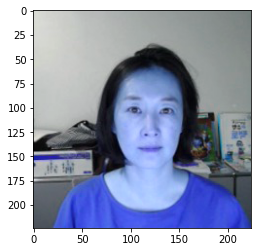

In [ ]:
img_show = img_bgr.copy()      
plt.imshow(img_bgr) # 이미지를 출력하기 위해 출력할 이미지를 올리기
plt.show() # 이미지를 출력

- 그런데 opencv는 예외적으로 BGR(파랑, 녹색, 빨강)을 사용
 - cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

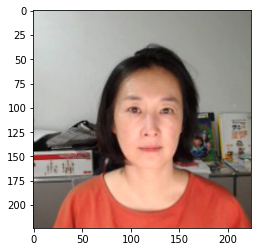

In [ ]:
# plt.imshow 이전에 RGB 이미지로 바꾸기
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb) 
plt.show() # 이미지 실제 출력

2. 얼굴 검출 & 랜드마크 검출 하기

In [ ]:
# detector를 선언
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환


In [ ]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)
print(dlib_rects)   


rectangles[[(79, 88) (154, 163)]]


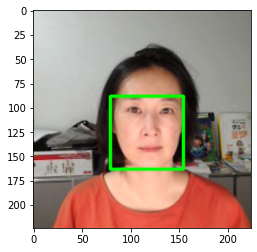

In [ ]:
# 찾은 얼굴 영역 박스 리스트

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()


- bz2: upzip하기


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/study_aiffel/Exp/exp7

!bunzip2 -qq "/content/drive/MyDrive/Colab Notebooks/study_aiffel/Exp/exp7/shape_predictor_68_face_landmarks.dat.bz2"


/content/drive/MyDrive/Colab Notebooks/study_aiffel/Exp/exp7
bunzip2: Can't open input file /content/drive/MyDrive/Colab Notebooks/study_aiffel/Exp/exp7/shape_predictor_68_face_landmarks.dat.bz2: No such file or directory.


In [ ]:
model_path = '/content/drive/MyDrive/Colab Notebooks/study_aiffel/Exp/exp7/shape_predictor_68_face_landmarks.dat'
   
landmark_predictor = dlib.shape_predictor(model_path)

3. Face Landmark

In [ ]:
list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성    

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))

68


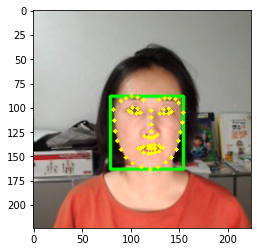

In [ ]:

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    # RGB 이미지로 전환
plt.imshow(img_show_rgb)
    # 이미지를 준비
plt.show()
    # 이미지를 출력

**4**. 이미지 삽입하기

In [ ]:

for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # 코의 index는 30 입니다
    x = landmark[30][0] # 이미지에서 코 부위의 x값
    y = landmark[30][1] - dlib_rect.height()//2 # 이미지에서 코 부위의 y값 - 얼굴 영역의 세로를 차지하는 픽셀의 수//2 → (437, 182-(186+1//2))
    w = h = dlib_rect.width() # 얼굴 영역의 가로를 차지하는 픽셀의 수 (531-345+1) → max(x) - min(x) +1(픽셀의 수 이기 때문에 1을 더해줌 → 픽셀 수는 점 하나로도 1이 됨)
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(121, 124)
(x,y) : (121,86)
(w,h) : (76,76)


In [ ]:
sticker_path = '/content/drive/MyDrive/Colab Notebooks/study_aiffel/Exp/exp7/cat-whiskers.png' 
img_sticker = cv2.imread(sticker_path) 
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape) 

(76, 76, 3)


In [ ]:

refined_x = x - w // 2
print ('(x,y) : (%d,%d)'%(refined_x, y)) # 음수 발생 : 이미지 범위를 벗어남


(x,y) : (83,86)


In [ ]:

if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0

if y < 0:
    img_sticker = img_sticker[-y:, :] 
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, y))

(x,y) : (83,86)


In [ ]:

sticker_area = img_show[y:y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_show[y:y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)


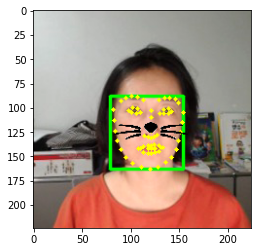

In [ ]:

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()